In [1]:
from datasets import load_dataset

# dataset_name = "dim/nfs_pix2pix_1920_1080_v5"
dataset_name = "dim/nfs_pix2pix_1920_1080_v6"
dataset = load_dataset(
    dataset_name,
    # cache_dir="/code/dataset/nfs_pix2pix_1920_1080_v5",
    cache_dir="/code/dataset/nfs_pix2pix_1920_1080_v6",
)
dataset = dataset["train"]

Resolving data files:   0%|          | 0/190 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/190 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/173 [00:00<?, ?it/s]

In [2]:
dataset

Dataset({
    features: ['input_image', 'edit_prompt', 'edited_image'],
    num_rows: 49424
})

In [ ]:
dataset[0]["input_image"].save("test.png")

In [27]:
import os

save_path_source = (
    "comfyui_sandbox/video_renders/render_nfs_4screens_6_sdxl_1_original/"
)

save_path_target = (
    "comfyui_sandbox/video_renders/render_nfs_4screens_6_sdxl_1_upscale_2x/"
)
files_list_target = sorted(os.listdir(save_path_target))

target_set = {int(item.replace(".png", "")) for item in files_list_target}


def if_save(example, idx):
    if idx in target_set:
        example["input_image"].save(save_path_source + "{:0>7}.png".format(idx))


dataset.map(
    if_save,
    with_indices=True,
    num_proc=20,
)

Map (num_proc=20):   0%|          | 0/49424 [00:00<?, ? examples/s]

Dataset({
    features: ['input_image', 'edit_prompt', 'edited_image'],
    num_rows: 49424
})

In [ ]:
from PIL import Image
import os

save_path_source = (
    # "comfyui_sandbox/render_video_renders/render_nfs_4screens_6_sdxl_1_original/"
    "comfyui_sandbox/video_renders/render_nfs_pix2pix_1920_1080_v6_upscale_2x_raw/train/source/"
)
files_list_source = sorted(os.listdir(save_path_source))

save_path_target = (
    # "comfyui_sandbox/video_renders/render_nfs_4screens_6_sdxl_1_upscale_2x/"
    "comfyui_sandbox/video_renders/render_nfs_pix2pix_1920_1080_v6_upscale_2x_raw/train/target/"
)
files_list_target = sorted(os.listdir(save_path_target))

In [40]:
len(files_list_source), len(files_list_target)

(3982, 3982)


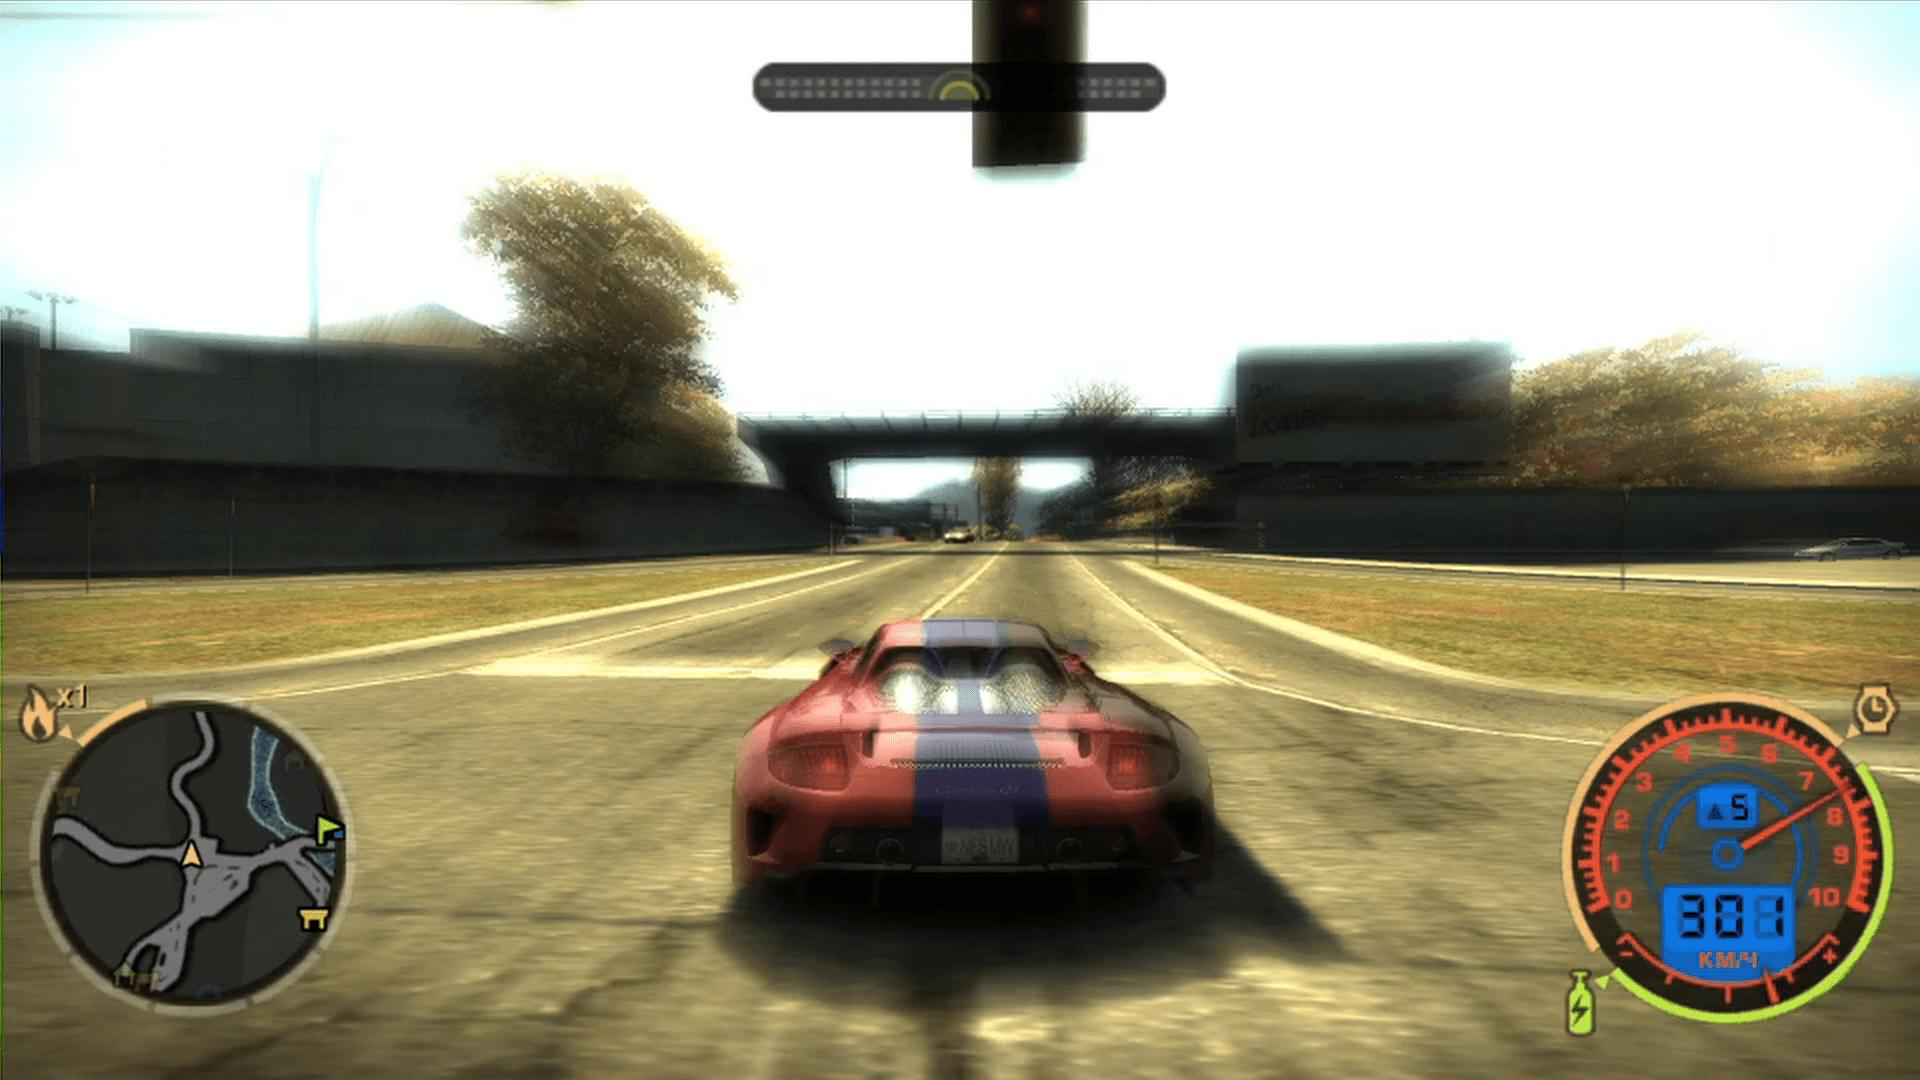
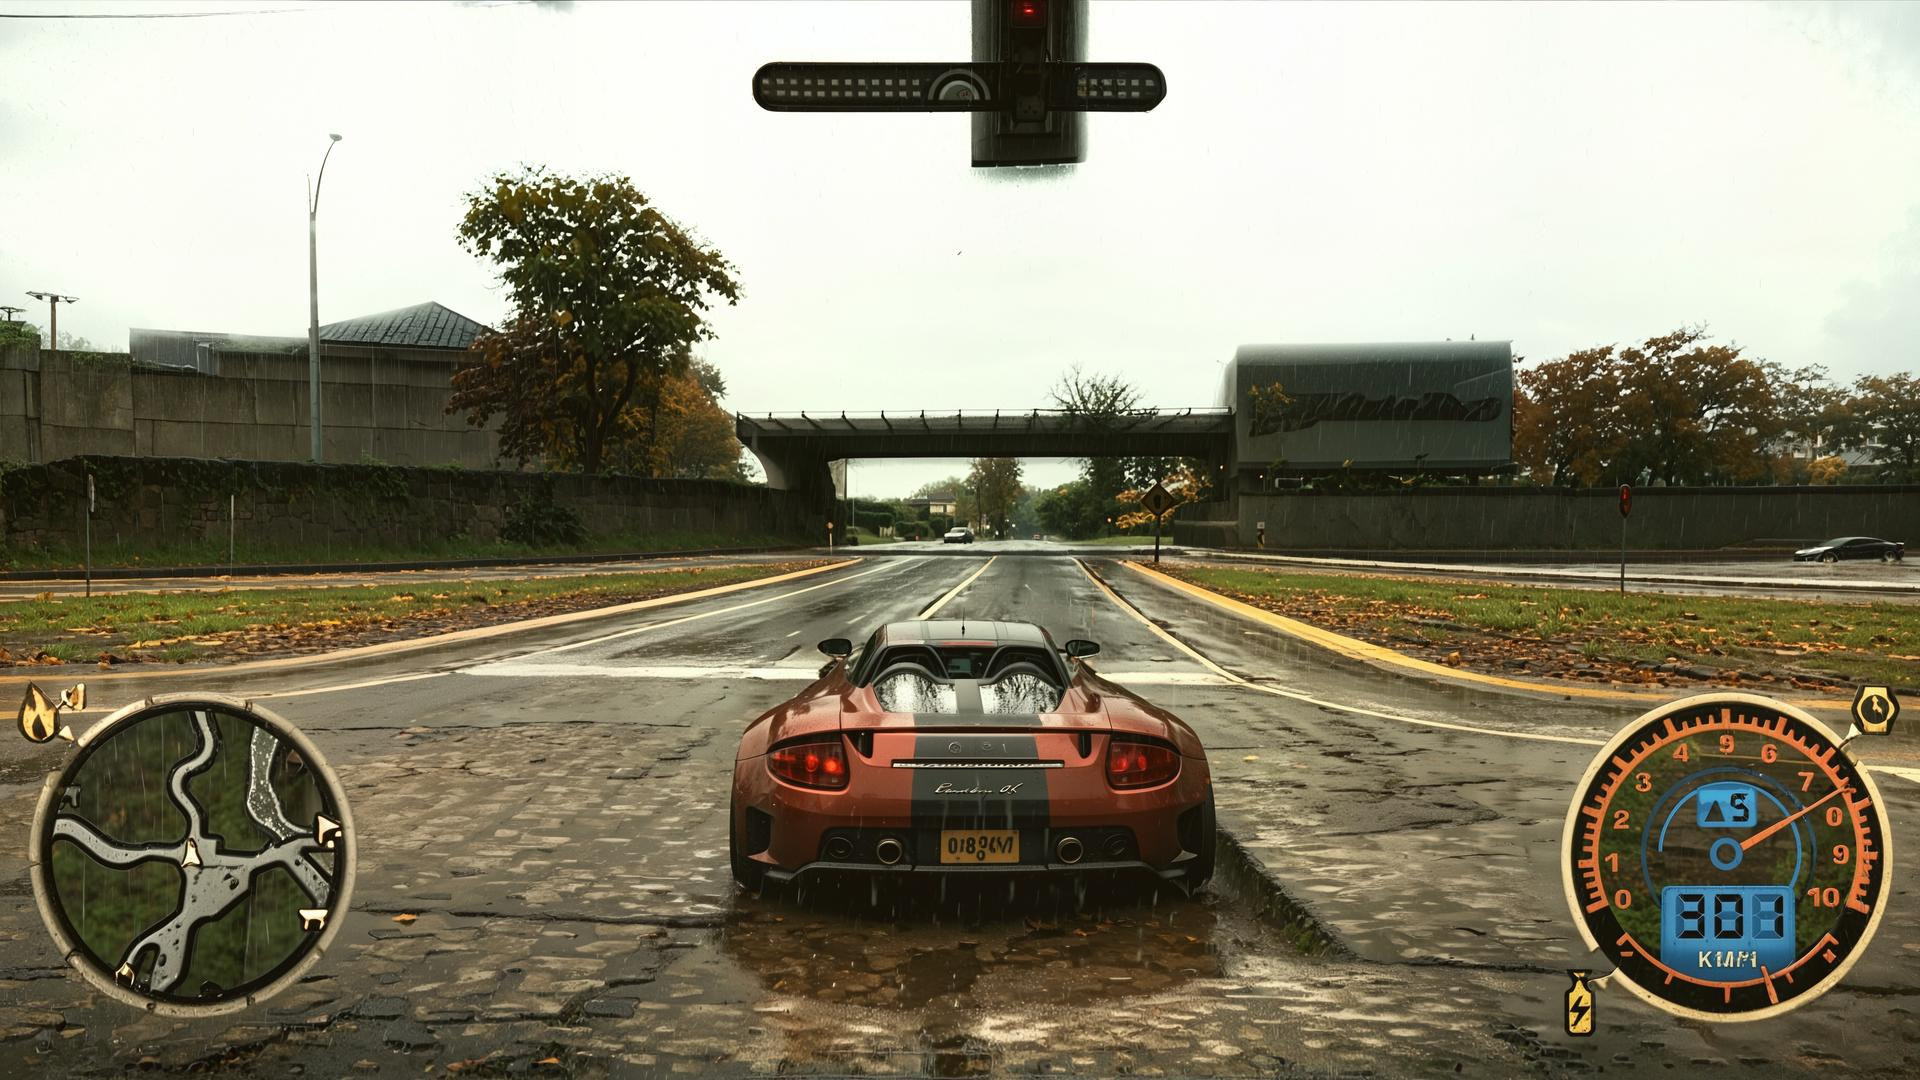

In [42]:
from jupyter_compare_view import compare

# pos = 1900
pos = 500

compare(
    Image.open(save_path_source + files_list_source[pos]).convert("RGB"),
    Image.open(save_path_target + files_list_target[pos]).convert("RGB"),
    # dataset[pos]["input_image"].convert("RGB"),
    # dataset[pos]["edited_image"].convert("RGB"),
    cmap="gray",
    start_mode="horizontal",
    start_slider_pos=0.73,
)

In [ ]:
# cp /code/comfyui_sandbox/video_renders/render_nfs_4screens_6_sdxl_1_upscale_2x/* /code/comfyui_sandbox/video_renders/render_nfs_pix2pix_1920_1080_v6_upscale_2x_raw/train/target/

In [ ]:
# cp /code/comfyui_sandbox/video_renders/render_nfs_4screens_6_sdxl_1_original/* /code/comfyui_sandbox/video_renders/render_nfs_pix2pix_1920_1080_v6_upscale_2x_raw/train/source/

In [ ]:
import pandas as pd

metadata = []
for item in files_list_source:
    # print(item)
    metadata.append(
        {
            "input_image_file_name": "source/" + item,
            "edited_image_file_name": "target/" + item,
            "edit_prompt": "",
        }
    )
    # break

pd.DataFrame(metadata).to_csv(
    "comfyui_sandbox/video_renders/render_nfs_pix2pix_1920_1080_v6_upscale_2x_raw/train/metadata.csv"
)

In [54]:
from datasets import load_dataset

new_dataset = load_dataset(
    "comfyui_sandbox/video_renders/render_nfs_pix2pix_1920_1080_v6_upscale_2x_raw/train"
)

Resolving data files:   0%|          | 0/7965 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]


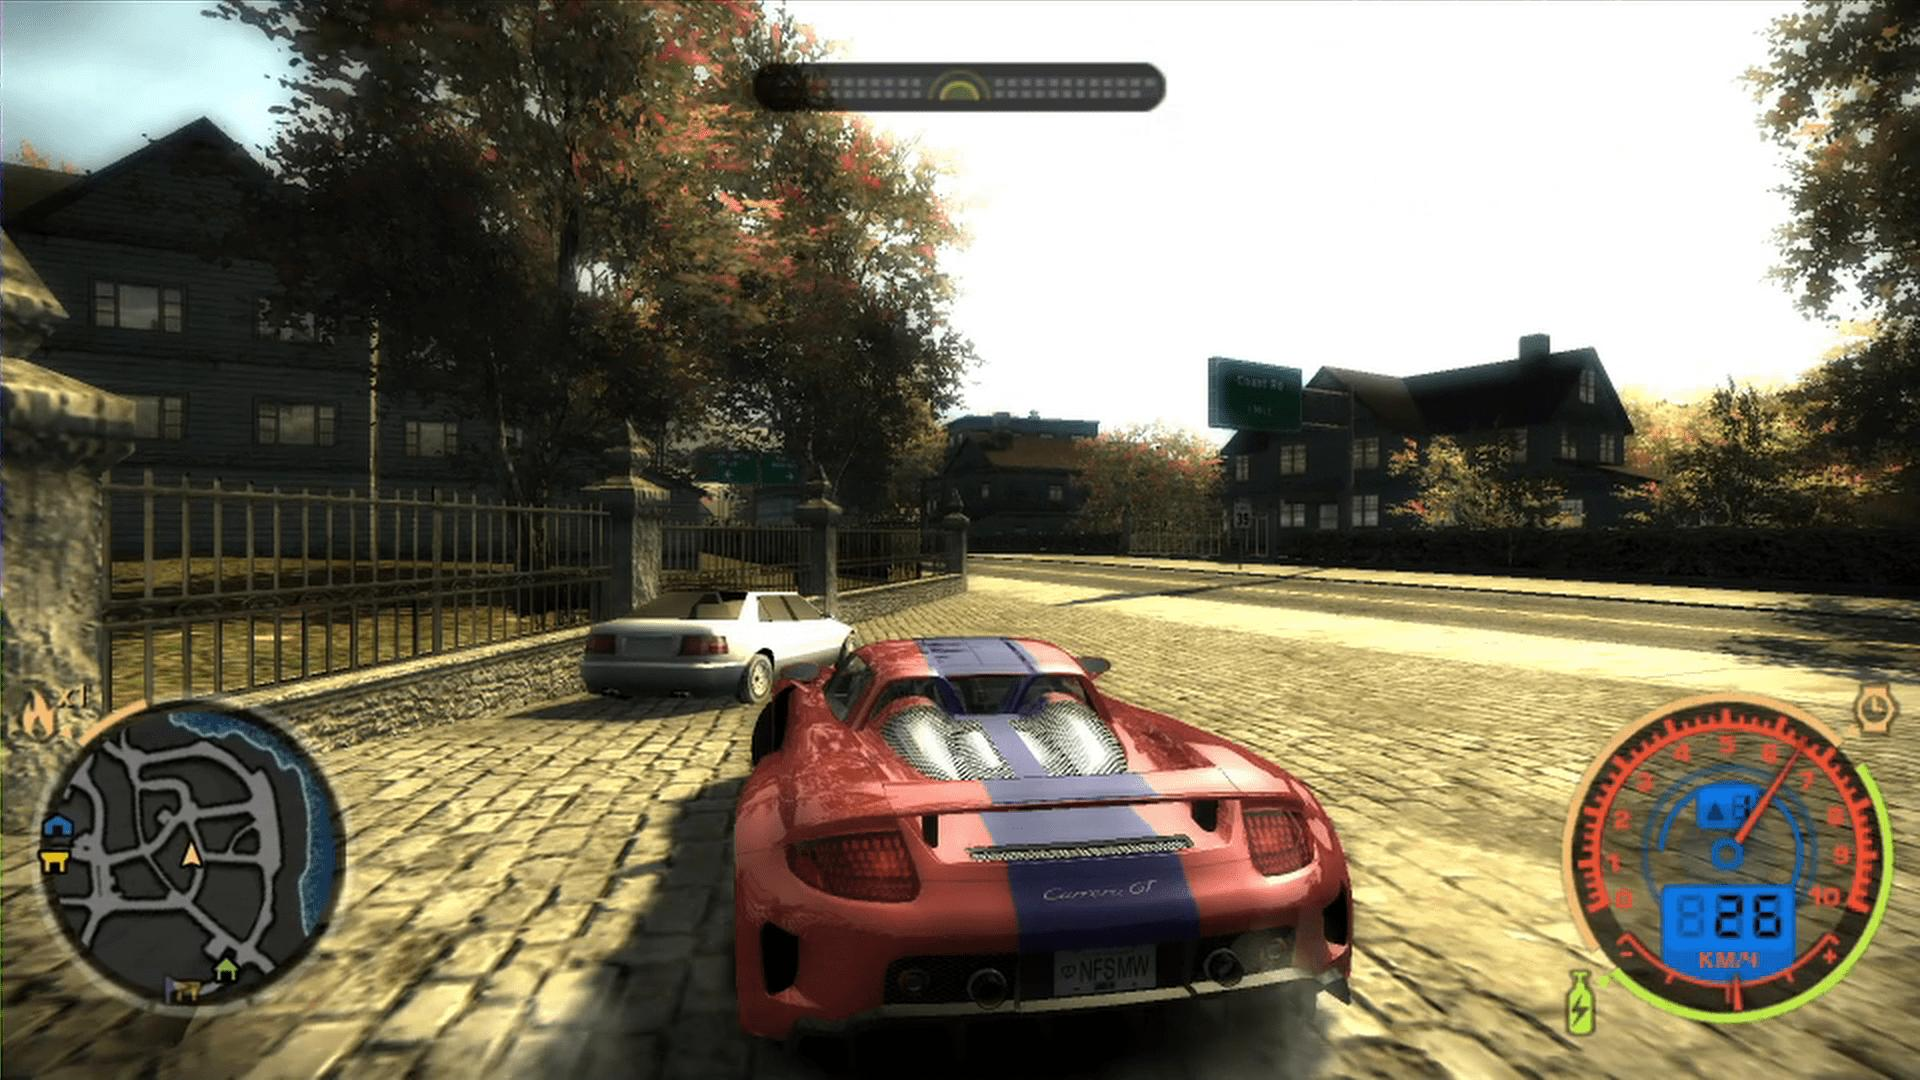
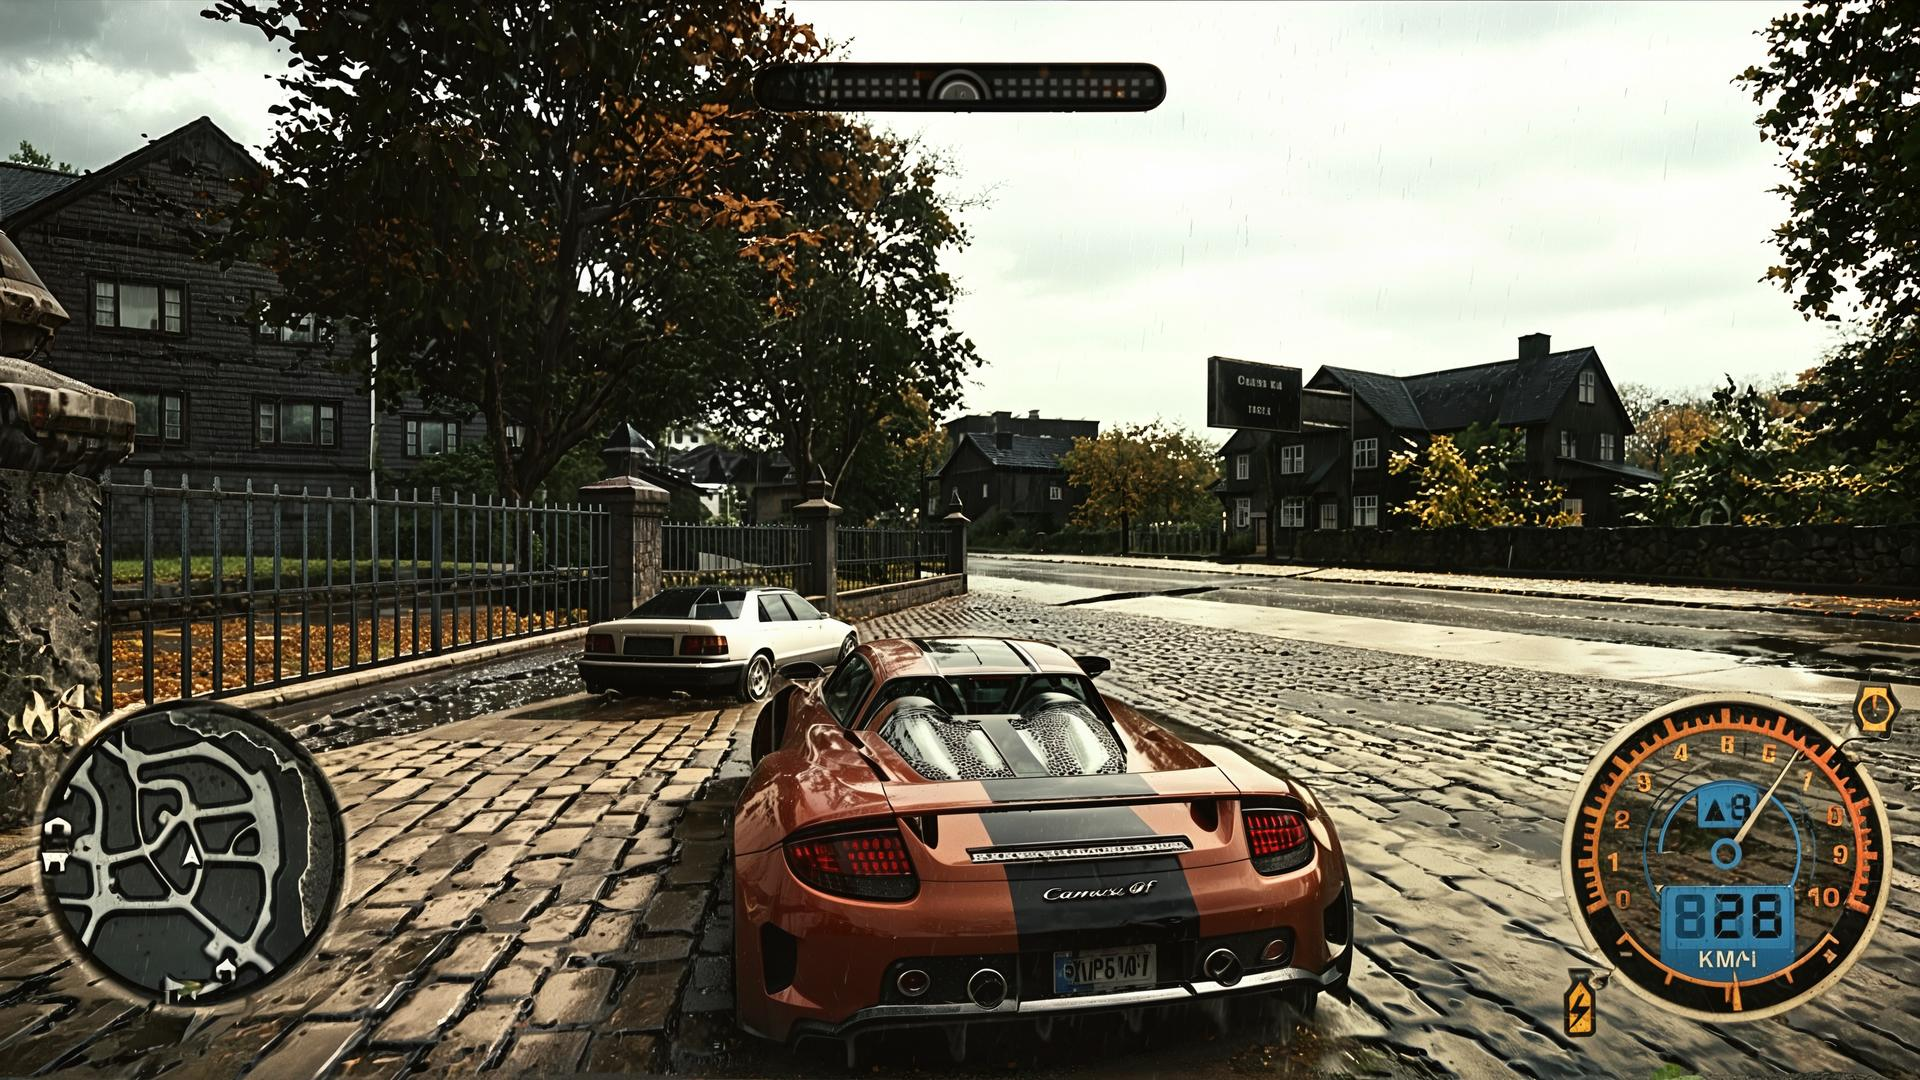

In [55]:
from jupyter_compare_view import compare

pos = 1900
# pos = 500

compare(
    new_dataset["train"][pos]["input_image"].convert("RGB"),
    new_dataset["train"][pos]["edited_image"].convert("RGB"),
    cmap="gray",
    start_mode="horizontal",
    start_slider_pos=0.73,
)

In [ ]:
# new_dataset.push_to_hub("dim/nfs_pix2pix_1920_1080_v6_upscale_2x_raw")